In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**The following code is used to replicate the graphs shown on page 810, depicting demand of the actual HDD market in the time period 1981 - 1998**

OBS: ALL PATHS SHOULD BE CHANGED TO ACTUAL PATHS

In [148]:
# Import state data
state = pd.read_csv('/Users/annaabildskov/Desktop/Documents/Polit/3. sem KA/Dyn. Prog/ReplicatingInnovatorsDilemma/1 Summary Statistics/Data/State.csv')
state = state.drop(columns=['3'])

# Import quality (storage capacity) data
quality = pd.read_csv('/Users/annaabildskov/Desktop/Documents/Polit/3. sem KA/Dyn. Prog/ReplicatingInnovatorsDilemma/1 Summary Statistics/Data/X.csv')
# Apply the exponential transformation
quality_exp = np.exp(quality)
quality_exp_mod = quality_exp.copy()
quality_exp_mod.columns = ['Original_X', 'Original_Y']
# Set the first four entries to NaN for 'Original_Y' - see section XX in the paper for an explanition why this is done
quality_exp_mod.loc[0:2, 'Original_Y'] = np.nan

# Import price data
price = pd.read_csv('/Users/annaabildskov/Desktop/Documents/Polit/3. sem KA/Dyn. Prog/ReplicatingInnovatorsDilemma/1 Summary Statistics/Data/P.csv')
price.columns = ['5.25-inch (Old)', '3.5-inch (New)']
# Convert prices to thousands of dollars
price['5.25-inch (Old)'] = price['5.25-inch (Old)'] * 1000
price['3.5-inch (New)'] = price['3.5-inch (New)'] * 1000
price = price.replace(0, np.nan)

# Import quantity data
quantity = pd.read_csv('/Users/annaabildskov/Desktop/Documents/Polit/3. sem KA/Dyn. Prog/ReplicatingInnovatorsDilemma/1 Summary Statistics/Data/Q.csv')
quantity.columns = ['Old', 'New', 'Percentage']
quantity['Old'] = quantity['Old'] / 1000
quantity['New'] = quantity['New'] / 1000


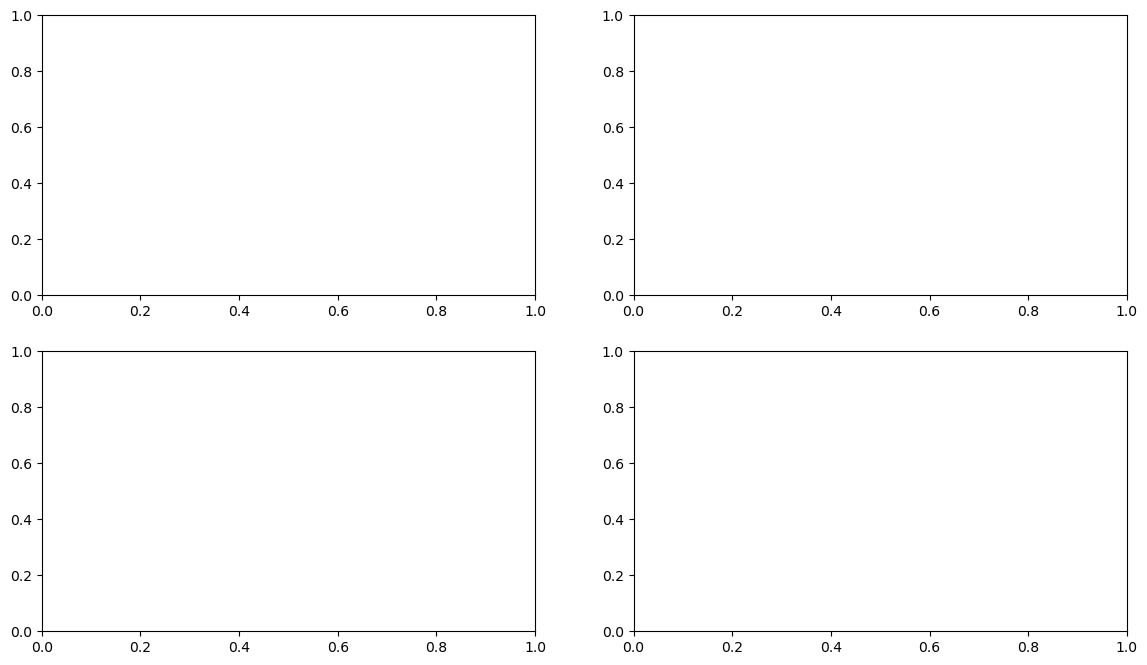

In [149]:
#Labels for the plot
labels = ['Old-only', 'Both', 'New-only']
#x-axis is the time period
x = np.linspace(1981,1998, 18)

# Initilize 2 by 2 figure
fig, ax = plt.subplots(2, 2, figsize=(14, 8))

In [150]:
# Plot data with specified markers and linestyles
ax[1,1].plot(x, state['2'],  linestyle='--', color='steelblue', marker='^', markerfacecolor='white', linewidth=1,
        zorder=3, label=labels[2], markersize=5)                # New-only
ax[1,1].plot(x, state['1'], linestyle='-', color='steelblue', marker='o', markerfacecolor='white', linewidth=1,    # Both
        label=labels[1], markersize=5, zorder=3)
ax[1,1].plot(x, state['0'], 'o-', label=labels[0], color='steelblue', linewidth=1,
        markersize=5, zorder=3) # Old-only

# Title and axis labels
ax[1,1].set_title('Market Structure', fontsize=12)
ax[1,1].set_ylabel('(Number of firms)', fontsize=10)

# Set limits and ticks
ax[1,1].set_ylim(0, 12)
ax[1,1].set_xlim(1980, 1999)
ax[1,1].set_xticks(np.arange(1981, 1999, 2))

# Set ticks to be inside
ax[1,1].tick_params(axis='both', direction='in', length=4)

# Only show bottom and left spines (x and y axes)
for spine in ['top', 'right']:
    ax[1,1].spines[spine].set_visible(False)

# Make x and y axis lines slightly transparent
ax[1,1].spines['bottom'].set_alpha(0.5)
ax[1,1].spines['left'].set_alpha(0.5)

# Increase z-order to bring markers above the axes
for line in ax[1,1].lines:
    line.set_zorder(3)

# Show legend
ax[1,1].legend(loc='upper right', frameon=False, fontsize=10)


In [151]:
# Plotting
ax[1,0].plot(x, quality_exp_mod['Original_X'], label='5.25-inch', marker='o', color='steelblue') 
ax[1,0].plot(x, quality_exp_mod['Original_Y'], label='3.5.inch', marker='o', color='navy')

# Set y-axis to logarithmic scale
ax[1,0].set_yscale('log')

# Define custom ticks
ax[1,0].set_yticks([1, 10, 100, 1_000, 10_000, 100_000])
ax[1,0].set_xticks(np.arange(1981, 1999, 2))

# Add labels and title
ax[1,0].set_ylabel('(Megabytes)', fontsize=10)
ax[1,0].set_title('Average Quality', fontsize=12)
ax[1,0].legend(loc='upper left', frameon=False, fontsize=10)

In [152]:
ax[0,1].set_title('Average Price', fontsize=14)
ax[0,1].set_ylabel('(1998 Constant US $)', fontsize=10)
ax[0,1].plot(x, price['5.25-inch (Old)'], label='5.25-inch (Old)', color='steelblue', linestyle='solid', marker='o', ms=4)
ax[0,1].plot(x, price['3.5-inch (New)'], label='3.5-inch (New)', color='steelblue', linestyle='solid', linewidth=1, marker='^', ms=4, mfc='w')
# Set x-ticks
ax[0,1].set_xticks(np.arange(1981, 1999, 2))
# Set y-ticks
ax[0,1].set_yticks(np.arange(0, 3000, step=500))
ax[0,1].legend(loc='upper right', frameon=False, fontsize=10)

In [153]:
percentage = quantity['New'] / (quantity['New'] + quantity['Old']) * 100

# First axis for quantity shipped
ax1 = ax[0,0]
ax1.set_title('Industry-wide Shipment', fontsize=14)
ax1.set_ylabel('(Million units)', fontsize=10)
ax1.stackplot(x,quantity['Old'], quantity['New'], labels=['5.25-inch (Old)', '3.5-inch (New)'], colors=['steelblue', 'white'], edgecolor='steelblue', alpha=0.5)
ax1.set_ylim(0, 125)
ax1.set_yticks(np.arange(0, 126, step=25))
ax1.set_xticks(np.arange(1981, 1999, 2))

# Second axis for percentage
ax2 = ax1.twinx()
ax2.plot(x, percentage, label='Share of 3.5-inch, RHS', color='steelblue', linestyle='solid', linewidth = 1, marker='o', ms=4, mfc='w')
ax2.set_ylim(0, 125)
ax2.set_yticks(np.arange(0, 126, step=25))

# Get legend handles and labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine and place in one location
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=10, frameon=False)

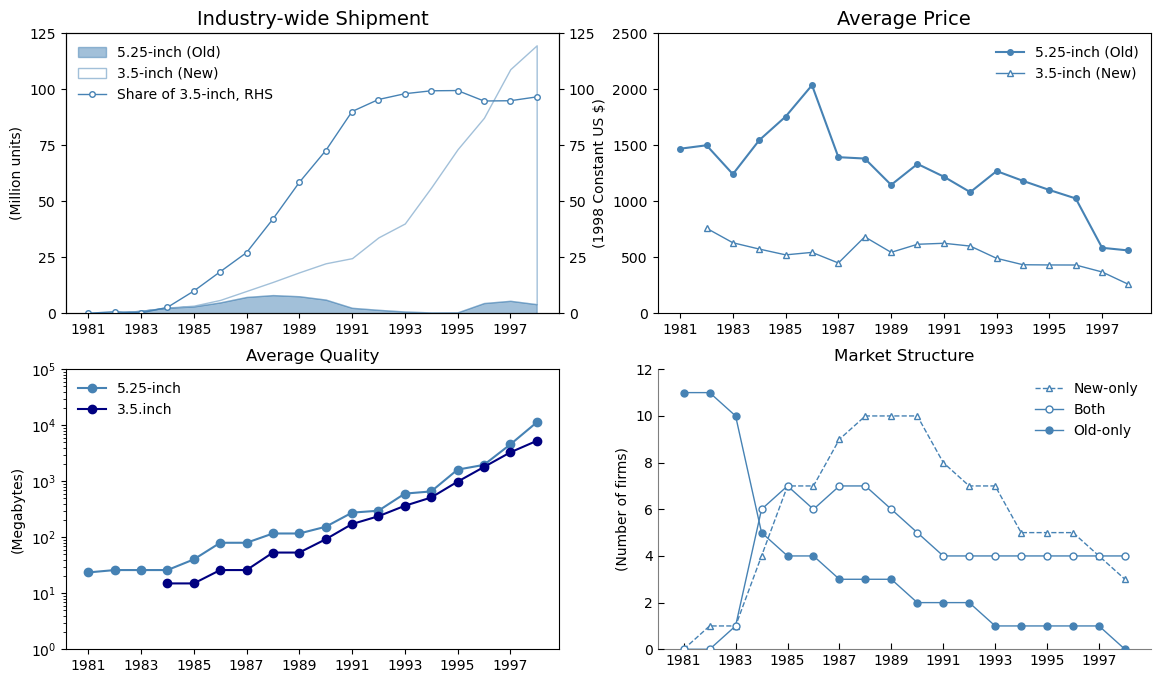

In [154]:
fig